In [47]:
!pip install apyori

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


## Importing Data set

In [49]:
dataset = pd.read_csv('/content/Dataset - Netflix Movie Recommendation Ec.csv',header=None)
transactions = []
for i in range(0, 7466):
  transactions.append([str(dataset.values[i,j]) for j in range(0, 20)])

## EClat

In [50]:
from apyori import apriori

rules = apriori(
    transactions=transactions,
    min_support=0.003,
    min_confidence=0.2,
    min_lift=3,         # Optional: Specify minimum lift
    min_length=2        # Minimum length of the itemset (e.g., at least 2 items)
)



In [51]:
results = list(rules)

In [52]:
results

[RelationRecord(items=frozenset({'Black Panther', 'Captain America'}), support=0.00334851326011251, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Captain America'}), items_add=frozenset({'Black Panther'}), confidence=0.24509803921568626, lift=5.140174047146949)]),
 RelationRecord(items=frozenset({'Game of thrones', 'Comedy nights with Kapil'}), support=0.0032145727297080095, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Game of thrones'}), items_add=frozenset({'Comedy nights with Kapil'}), confidence=0.20512820512820512, lift=3.1001764766946955)]),
 RelationRecord(items=frozenset({'Comedy nights with Kapil', 'Kanan Gill Comedy'}), support=0.008036431824270024, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Kanan Gill Comedy'}), items_add=frozenset({'Comedy nights with Kapil'}), confidence=0.2714932126696833, lift=4.103174748566509)]),
 RelationRecord(items=frozenset({'Prision Break', 'Game of thrones'}), support=0.004553978033753014, ordered_sta

## Proper Display

In [53]:
def inspect(results):
    movie_1 = [tuple(result[2][0][0])[0] for result in results]
    movie_2 = [tuple(result[2][0][1])[0] for result in results]
    supports = [result[1] for result in results]
    return list(zip(movie_1,movie_2,supports))
returninDataFrame = pd.DataFrame(inspect(results),columns=['Movie 1','Movie 2','Support'])


In [54]:
returninDataFrame

,Movie 1,Movie 2,Support
0,Captain America,Black Panther,0.003349
1,Game of thrones,Comedy nights with Kapil,0.003215
2,Kanan Gill Comedy,Comedy nights with Kapil,0.008036
3,Game of thrones,Prision Break,0.004554
4,Harry Potter 1,Harry Potter 2,0.005759
...,...,...,...
154,inception,nan,0.004018
155,The Lion King,nan,0.003349
156,The Lion King,nan,0.003081
157,The Silence of the Lambs,nan,0.003482


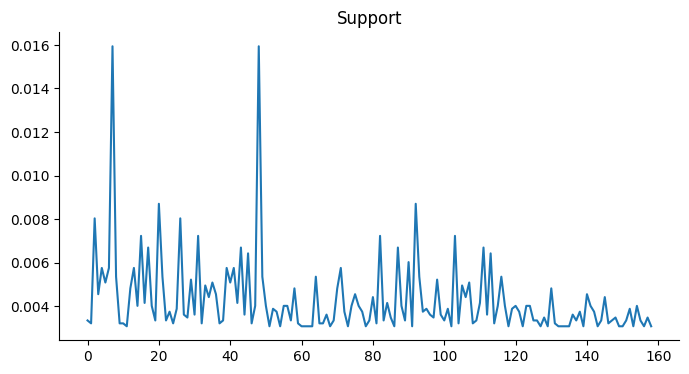

In [55]:
# @title Support

from matplotlib import pyplot as plt
returninDataFrame['Support'].plot(kind='line', figsize=(8, 4), title='Support')
plt.gca().spines[['top', 'right']].set_visible(False)

In [56]:
returninDataFrame.nlargest(n=10,columns='Support')

,Movie 1,Movie 2,Support
7,Interstellar,inception,0.015939
48,Interstellar,inception,0.015939
20,Billa,inception,0.008706
92,Billa,inception,0.008706
2,Kanan Gill Comedy,Comedy nights with Kapil,0.008036
26,Kanan Gill Comedy,nan,0.008036
15,The Dark Knight,Billa,0.007233
31,The Intouchables,Comedy nights with Kapil,0.007233
82,The Dark Knight,nan,0.007233
103,The Intouchables,nan,0.007233
